# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [211]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df_full = pd.DataFrame(iris.data)
df_full

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [212]:
df = pd.DataFrame({'X': df_full['Sepal.Width'], 'Y': df_full['Sepal.Length']})
df

,X,Y
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0
...,...,...
145,3.0,6.7
146,2.5,6.3
147,3.0,6.5
148,3.4,6.2


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [213]:
# Your code here

def alpha_func(D, idx):
   cov_ = np.cov(D[['X','Y']].loc[idx], rowvar=False)
   return ((cov_[1,1] - cov_[0,1]) /
           (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

Test the code below

In [214]:
alpha_func(df, range(100))

0.6189498510165619

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [215]:
rng = np.random.default_rng(5)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

0.602762653525732

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us? Calculating the mean of a single sample provides information specific to that particular sample from the whole population. The bootstrap method, by generating many resamples, allows for the calculation of metrics such as the standard error and confidence intervals, offering insights based on a wider range of variance.

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [216]:
# Add your code here to set the seed


# Function that params D - 1 bootstrap sample, idx -  array of indexes. Return mean of sample
def one_param_mean (D, idx):
    return np.mean(D.loc[idx])

def boot_SE(func,
            D,
            n=None,
            B=1000,
            seed=0):
    
    warnings.filterwarnings(action='ignore', category=FutureWarning, module='ISLP.models.columns', lineno=151)
    
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    bootstr_values = list()
    bootstr_values_arr = np.array([])
    n = n or D.shape[0]
    for i in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        value = func(D, idx)                              # value of each sample
        bootstr_values_arr = np.append(bootstr_values_arr , value)
    return bootstr_values_arr   


sepal_df = df_full['Sepal.Length']                         # make array with our one column
bootstr_mean_arr = boot_SE( one_param_mean, sepal_df, B=10000, seed=0 )
std = np.std(bootstr_mean_arr)
std

0.06770609155591377

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [217]:
N = 1000
bootstr_mean_arr = boot_SE( one_param_mean, sepal_df, None, N, seed=0 )
std = np.std(bootstr_mean_arr)                  # standart diviation
ste = std / np.sqrt(N)                          # standart error
print ( "standart deviation for ",N," bootstap resamples = ", std ) 
print ( "standart error = ", ste )

standart deviation for  1000  bootstap resamples =  0.06649295592099295
standart error =  0.002102691890675168


_(vi)_ What is the original mean value of `Sepal.Length`?

In [218]:
# Your code here
np.mean ( sepal_df )

5.843333333333334

Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

original mean value 5.843333333333334 </br>
bootstrap mean      5.843912666666667 </br>
The mean of the bootstrap sample means close to the original sample mean. This is because bootstrap samples are drawn with replacement from the original dataset, and thus they are representative of the original data distribution.

In [223]:
# Add your code here
N = 1000
bootstr_mean_arr_new = boot_SE( one_param_mean, sepal_df, None, N, seed=5 )
btsr_new_mean = np.mean(bootstr_mean_arr_new)
btsr_new_std = np.std(bootstr_mean_arr_new)
t_range = np.ptp(bootstr_mean_arr_new)

print ( "bootstrapped mean with",N," bootstap resamples = ", btsr_new_mean ) 
print ( "standart deviation with",N," bootstap resamples = ", btsr_new_std ) 
print ( "new bootstrap range with",N," bootstap resamples = ", t_range ) 

bootstrapped mean with 1000  bootstap resamples =  5.843912666666667
standart deviation with 1000  bootstap resamples =  0.06503449286169438
new bootstrap range with 1000  bootstap resamples =  0.3680000000000003


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [220]:
# Add your code here
conf_inter = np.percentile(bootstr_mean_arr_new, [2.5,97.5])
print ( "95% confidence intervals with 1000 bootstap resamples = ",conf_inter ) 

95% confidence intervals with 1000 bootstap resamples =  [5.71731667 5.96735   ]


In [242]:
inter = np.percentile(bootstr_mean_arr_new, [99.9])
inter

array([6.00534067])

_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?
Standart deviation of bootstrap means. The plot mean of means is close to original mean and exactly in the middle of 95% confidence interval.

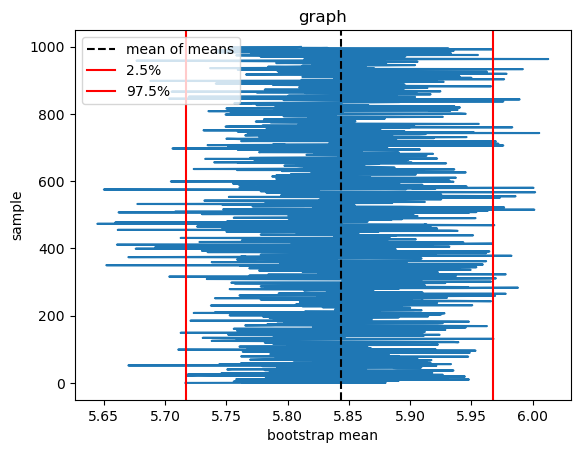

In [239]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

#Add your code here
#ax.plot(bootstr_mean_arr_new)
ax.plot( bootstr_mean_arr_new, range(len(bootstr_mean_arr_new)) )
ax.axvline(btsr_new_mean, color='black', linestyle='--', label='mean of means')
ax.axvline(conf_inter[0], color='red', linestyle='solid', label='2.5%')
ax.axvline(conf_inter[1], color='red', linestyle='solid', label='97.5%')


# Add a title
#Add your code here
plt.title("graph")

# Add a label to the x-axis
#Add your code here
plt.xlabel('bootstrap mean')

# Add a label to the y-axis
#Add your code here
plt.ylabel('sample')

# Show the plot
plt.legend();
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [245]:
# Write your answer here 
# The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment.

# Based on our calculations and statistical analysis, we observed that the original sample mean and the mean of the bootstrap samples are almost identical. 
# The original sample mean is 5.8433. This value represents the central tendency of our sample data but only covers approximately 50% of the cases.
# To account for more variability and cover 97.5% of the cases, we need to consider a higher threshold. In this context, the value to cover 97.5% of the cases is approximately 5.96735.
# However, there is still a small proportion of cases (2.5%) with petal lengths extending even further, up to 6.005. This represents the variability in the data where some outliers exist.

# I recommend considering the average petal length to be 5.96735. This value is more inclusive, covering a significant portion (97.5%) of the data distribution.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
